## Conditional Spectrum (CS) Based Record Selection for Multiple-Stripe Analysis (MSA) Upon Carrying out Probabilistic Seismic Hazard Analysis (PSHA) via OpenQuake
Created on: 26/08/2021

Updated on: 06/07/2023

Author: Volkan Ozsarac

Affiliation: EUCENTRE, European Centre for Training and Research in Earthquake Engineering

PhD, Seismic Risk Specialist, Structural Engineer

email:  ozsarac.volkan@eucentre.it

## Package installation on Google Colaboratory

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')
# Change directory to the location of notebook
%cd /content/drive/My Drive/Colab Notebooks/EzGM/notebooks
# Install EzGM
!pip install --upgrade pip
!pip install git+https://github.com/volkanozsarac/EzGM.git

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/EzGM/notebooks
  Cloning https://github.com/volkanozsarac/EzGM.git to /tmp/pip-req-build-w2z83dpr
  Running command git clone --filter=blob:none --quiet https://github.com/volkanozsarac/EzGM.git /tmp/pip-req-build-w2z83dpr
  Resolved https://github.com/volkanozsarac/EzGM.git to commit c33ab0325a3bea1535681f8b52710384403fbd1d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 92.2 MB/s eta 

In [ ]:
from EzGM.selection import ConditionalSpectrum
from EzGM.utility import run_time, make_dir, hazard_curve, disaggregation_mag_dist, disaggregation_mag_dist_eps, check_gmpe_attributes, get_esm_token
from time import time
import os
import numpy as np

In [ ]:
# Acquire the run start time
start_time = time()

### 1) Perform PSHA via OpenQuake

In [ ]:
# Hazard Analysis via OpenQuake
# Set path to OpenQuake model .ini file path
parent_path = os.path.dirname(os.path.realpath(""))
oq_model = os.path.join(parent_path,'input files','OQ_Model') # this is the folder where oq model is located
oq_ini = 'job.ini' # this is .ini file used to run hazard model via openquake

# Set command to call OpenQuake
oq = 'oq'

# Directory to place post-processing results
post_dir = 'OQproc_Outputs'

# Read .ini file for post-processing purposes
with open(os.path.join(oq_model,oq_ini)) as f:
    info = f.readlines()
    for line in info:
        if line.startswith('poes'):
            poes = [float(poe) for poe in
                    line.split('\n')[0].split('=')[1].split(',')]
        if line.startswith('export_dir'):
            results_dir = os.path.join(oq_model, line.split('\n')[0].split('=')[1].strip())
        if line.startswith('mag_bin_width'):
            exec(line.strip())
        if line.startswith('distance_bin_width'):
            exec(line.strip())
        if line.startswith('reference_vs30_value'):
            exec(line.strip())

# Create the export directory for analysis results
make_dir(results_dir)

# Create the directory for processed results
make_dir(post_dir)

# Run the analysis via system command
cwd = os.getcwd() # Current working directory
os.chdir(oq_model) # Change directory, head to OQ_model folder
os.system(oq + ' engine --run ' + oq_ini + ' --exports csv')
os.chdir(cwd) # go back to the previous working directory

### 2) Post-process PSHA results

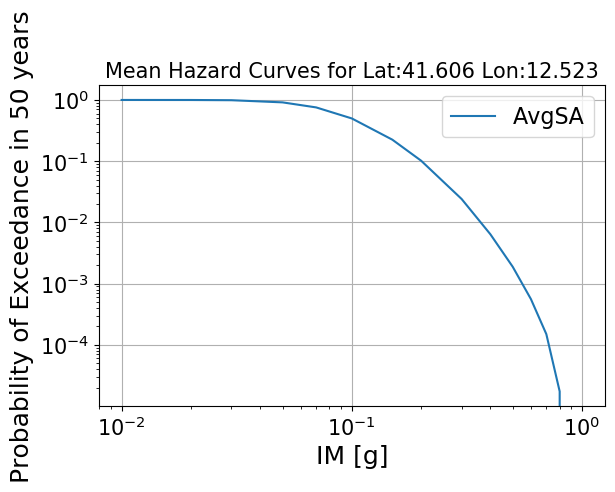

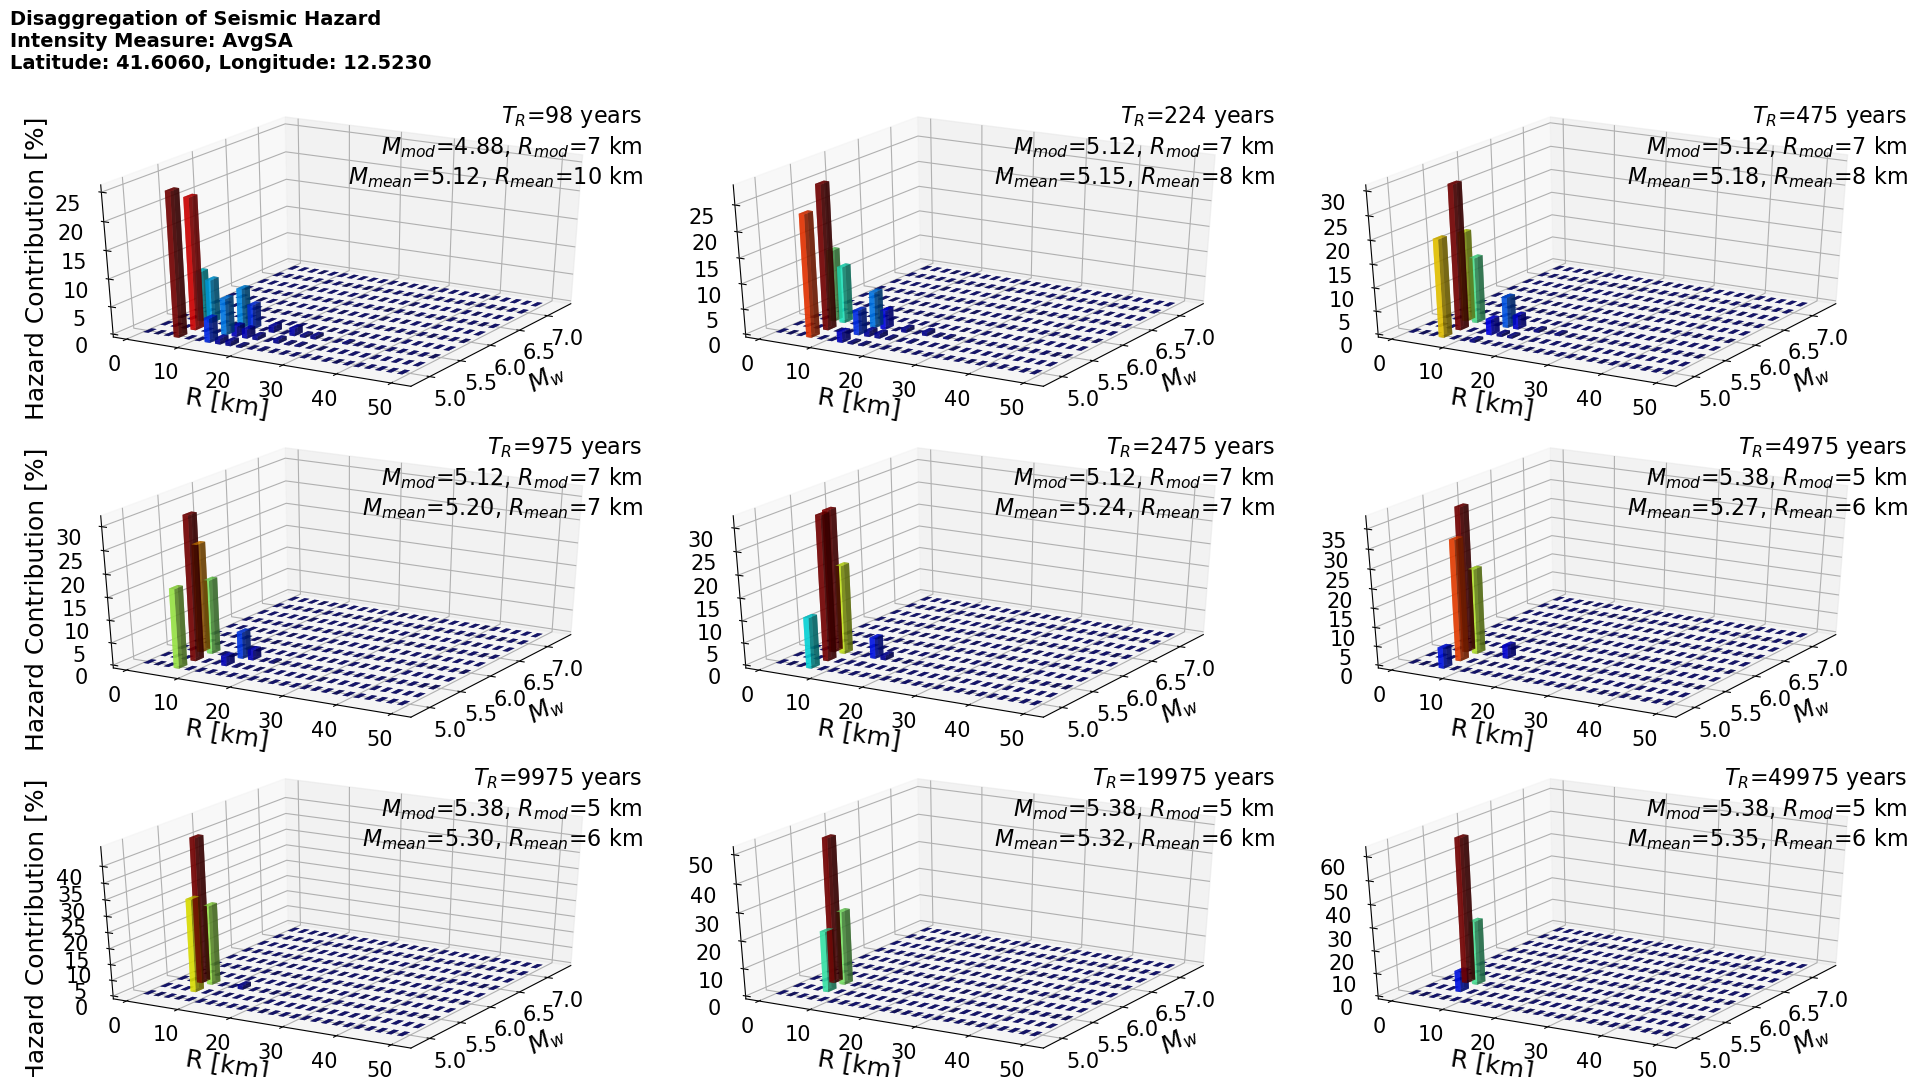

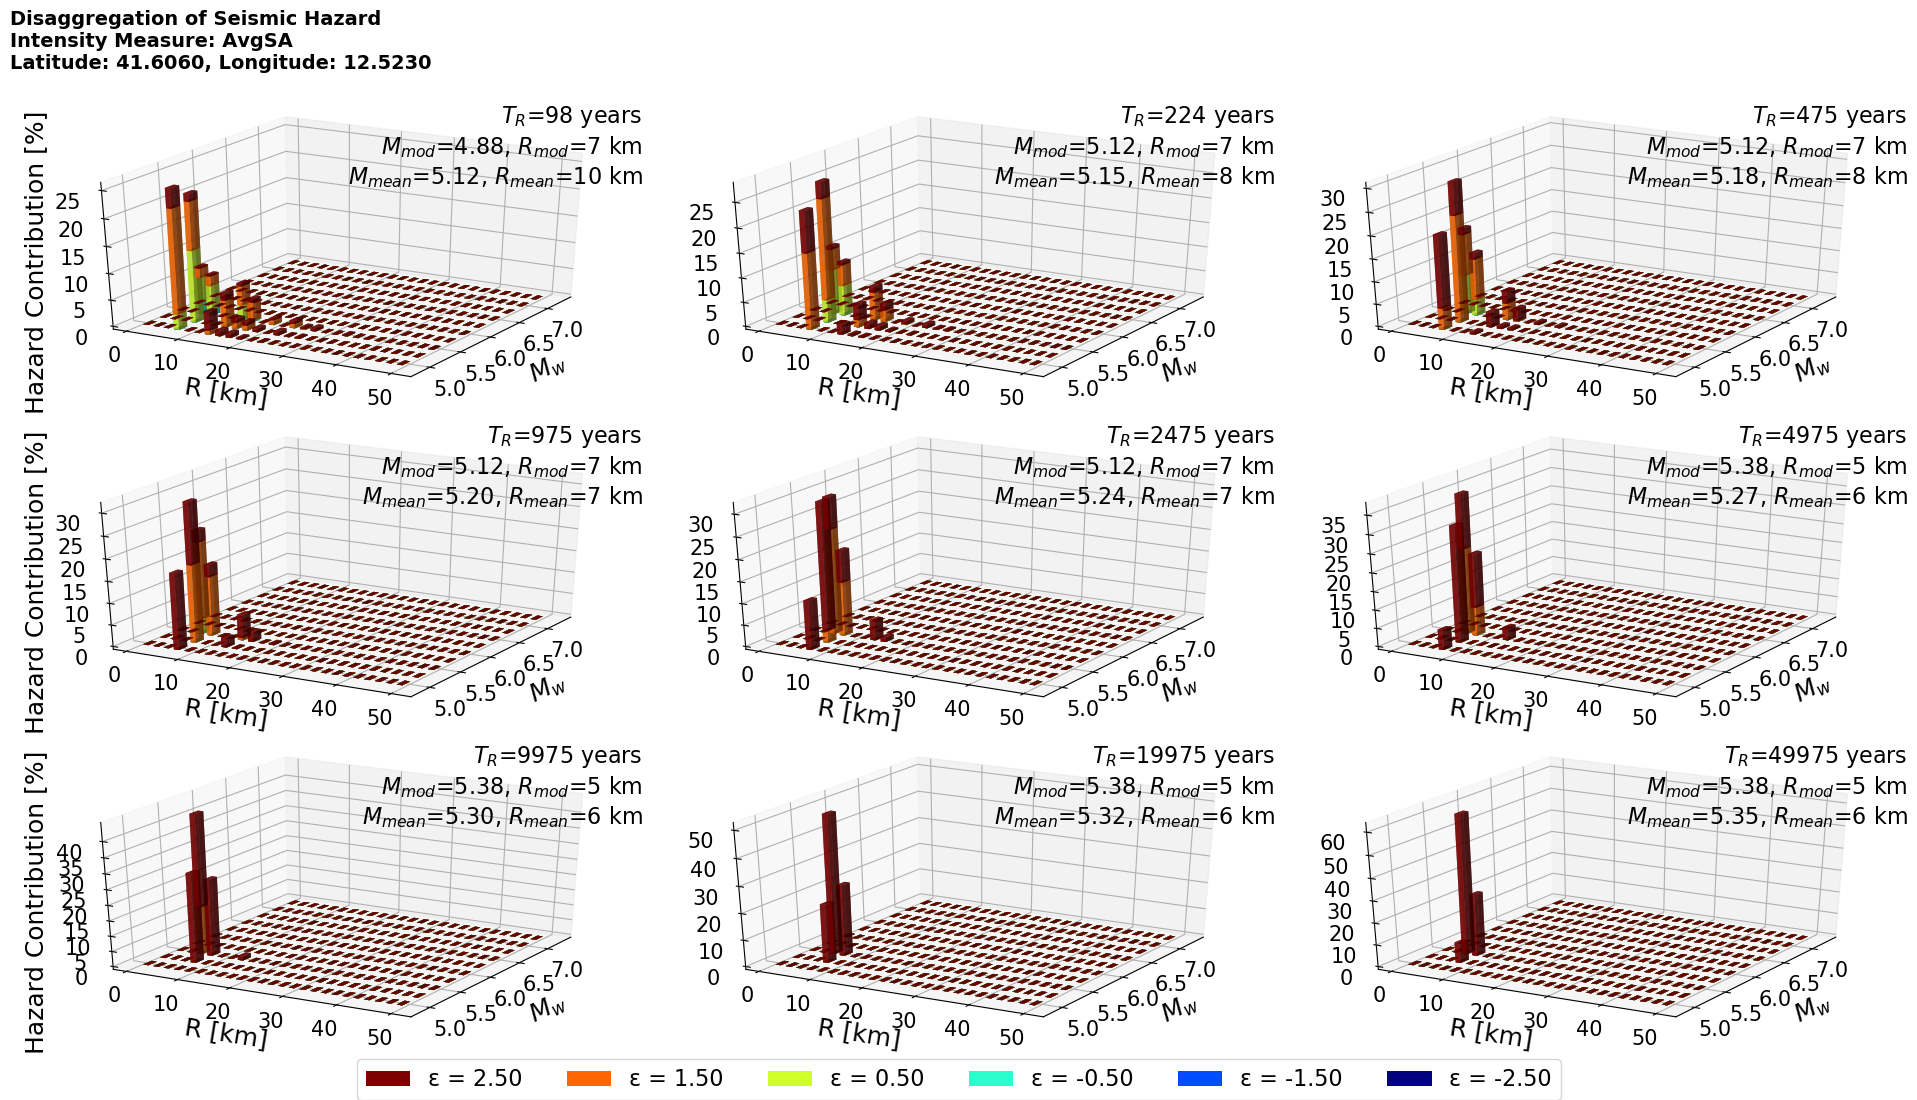

In [ ]:
# Extract and plot hazard curves in a reasonable format
hazard_curve(poes, results_dir, post_dir, show=1)

# Extract and plot disaggregation results by M and R
disaggregation_mag_dist(mag_bin_width, distance_bin_width, results_dir, post_dir, num_rows=3, show=1)

# Extract and plot disaggregation results by M, R and epsilon
disaggregation_mag_dist_eps(mag_bin_width, distance_bin_width, results_dir, post_dir, num_rows=3, show=1)

### 3) Select the ground motions for different return periods, IM=AvgSA(T*)

GMPE name: BooreEtAl2014
Supported tectonic region: ACTIVE_SHALLOW_CRUST
Supported standard deviation: Intra event, Inter event, Total
Supported intensity measure: PGA, PGV, SA
Supported intensity measure component: RotD50
Supported SA period range: 0.01 - 10.0
Required distance parameters: rjb
Required rupture parameters: rake, mag
Required site parameters: vs30
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 4.36 %
Max error in standard deviation = 6.04 %
The errors are within the target 10 percent %


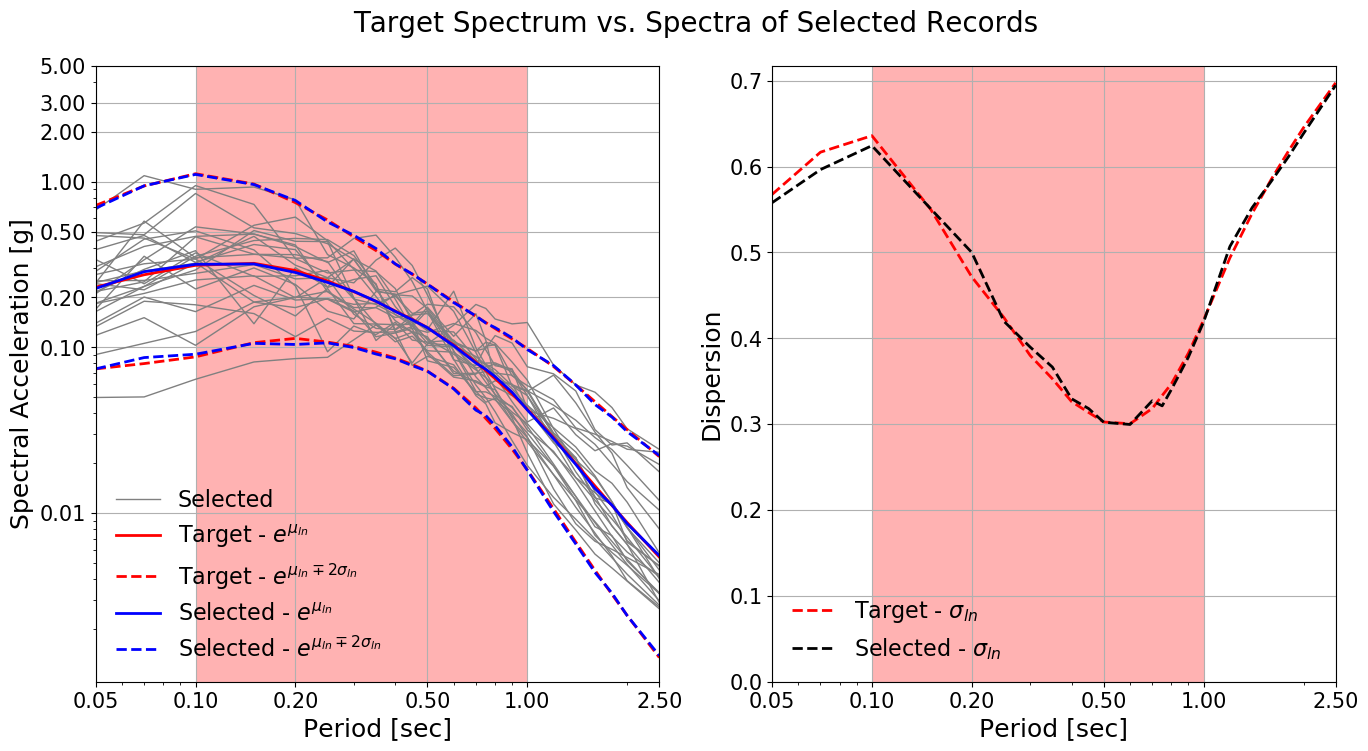


Started executing download method to retrieve selected records from https://esm-db.eu
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.4-in-50-years\unscaled_records_2023_7_6_11_35_34_3_187_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.4-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 3.03 %
Max error in standard deviation = 4.26 %
The errors are within the target 10 percent %


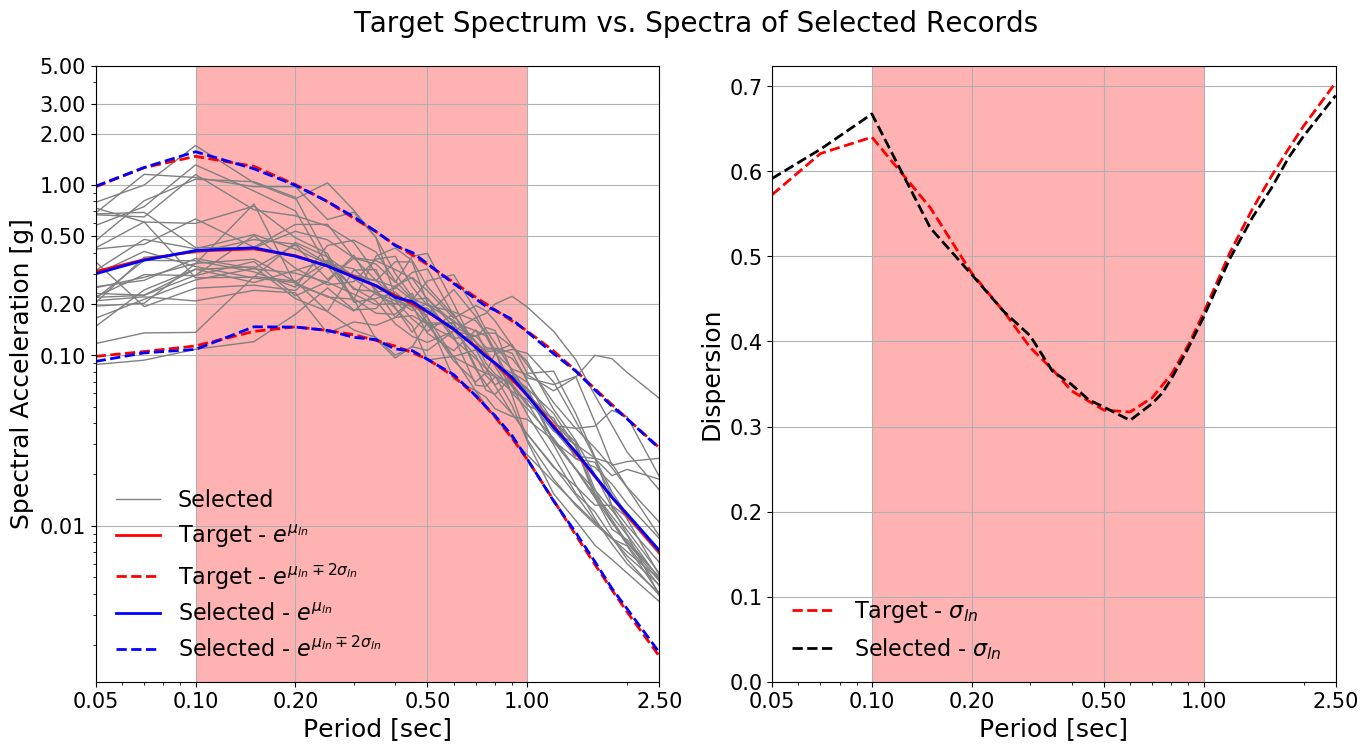


Started executing download method to retrieve selected records from https://esm-db.eu
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.2-in-50-years\unscaled_records_2023_7_6_11_36_18_3_187_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.2-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 6.37 %
Max error in standard deviation = 9.81 %
The errors are within the target 10 percent %


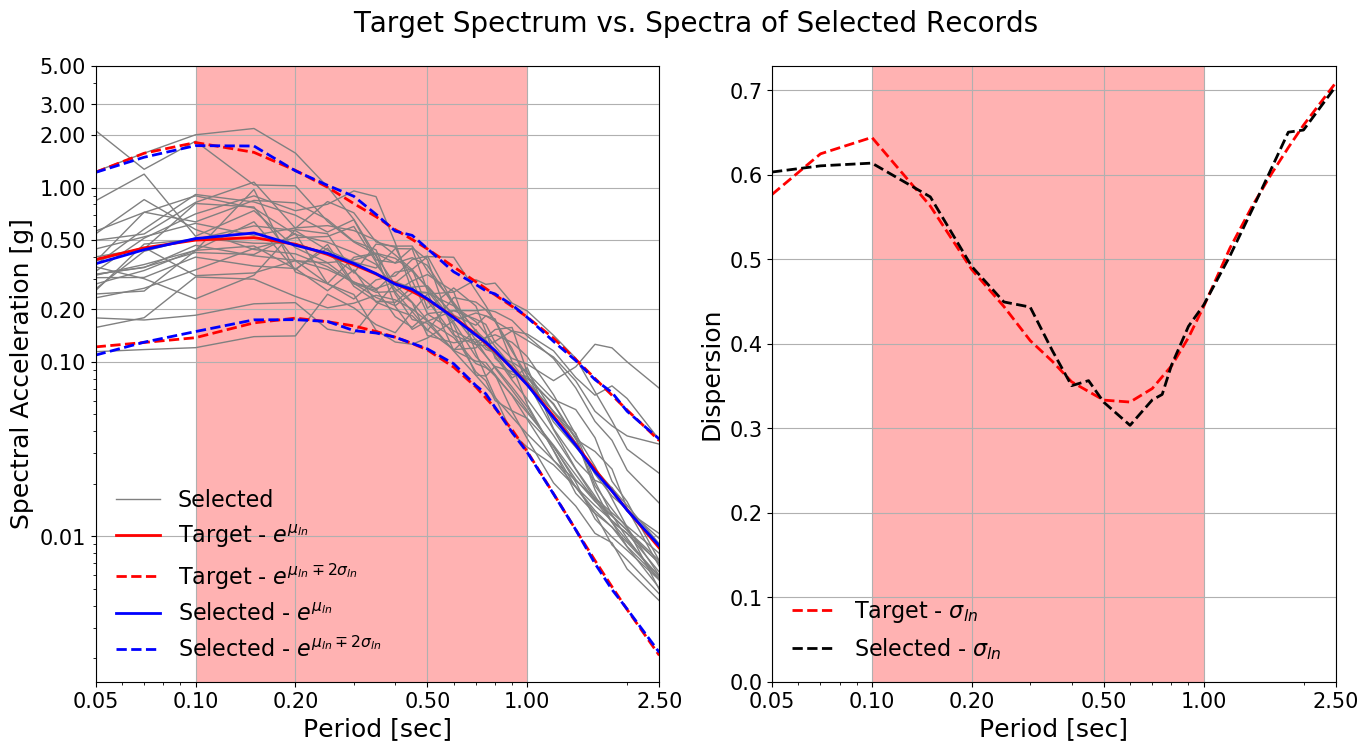


Started executing download method to retrieve selected records from https://esm-db.eu
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.1-in-50-years\unscaled_records_2023_7_6_11_36_59_3_187_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.1-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 10.63 %
Max error in standard deviation = 11.01 %


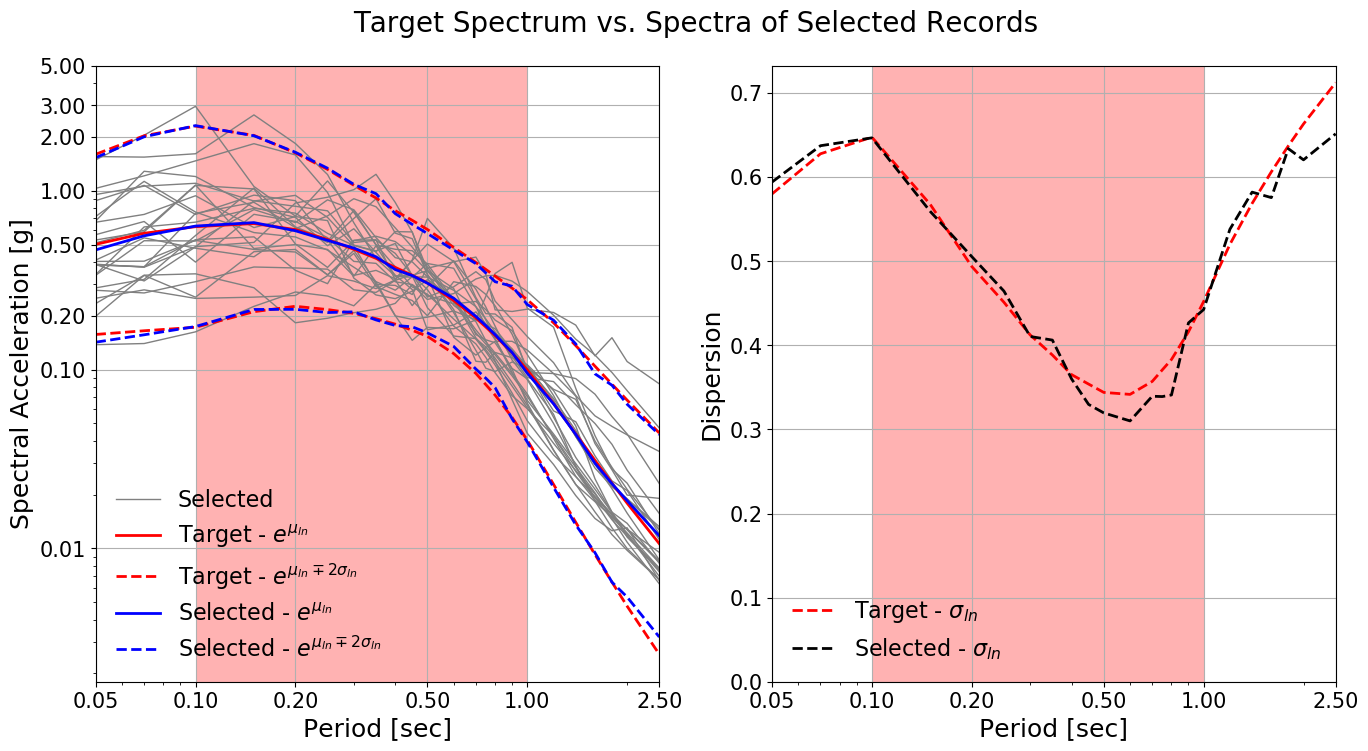


Started executing download method to retrieve selected records from https://esm-db.eu
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.05-in-50-years\unscaled_records_2023_7_6_11_37_48_3_187_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.05-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 12.40 %
Max error in standard deviation = 12.63 %


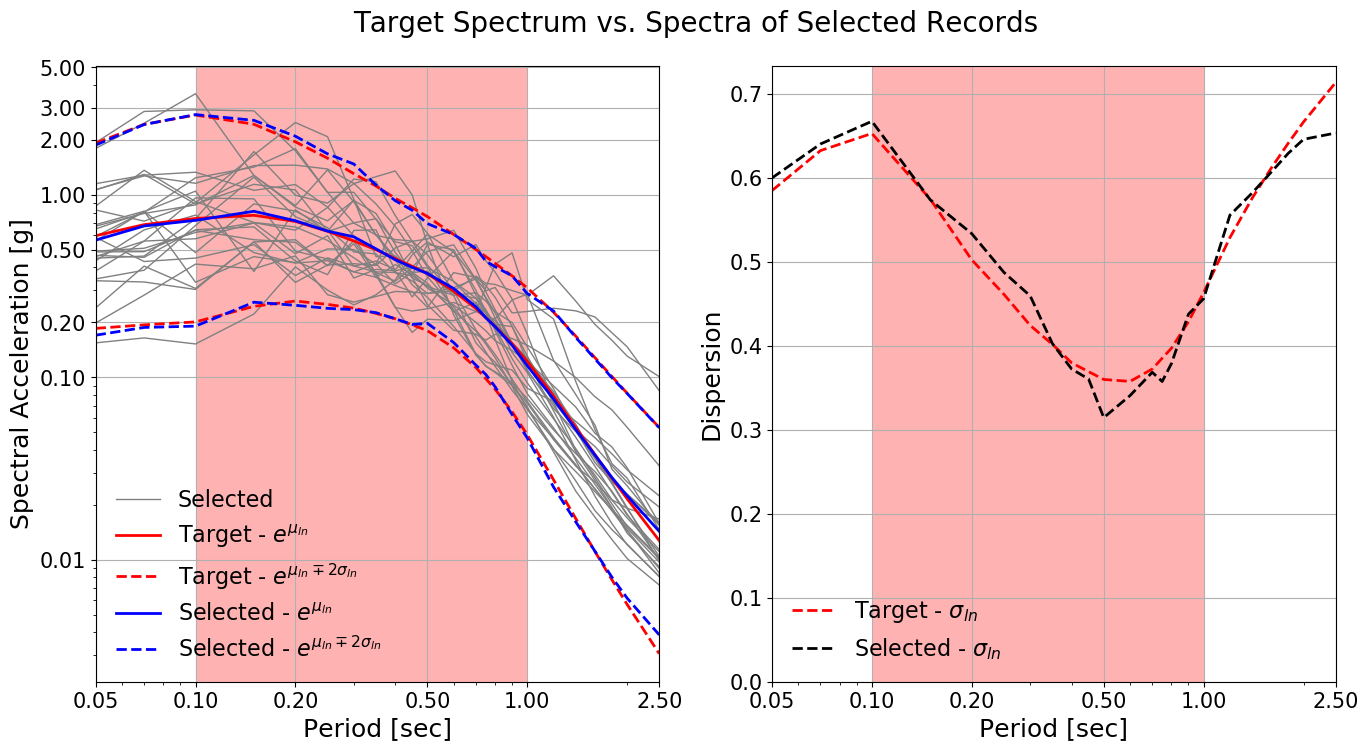


Started executing download method to retrieve selected records from https://esm-db.eu
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.02-in-50-years\unscaled_records_2023_7_6_11_38_34_3_187_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.02-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 19.85 %
Max error in standard deviation = 11.46 %


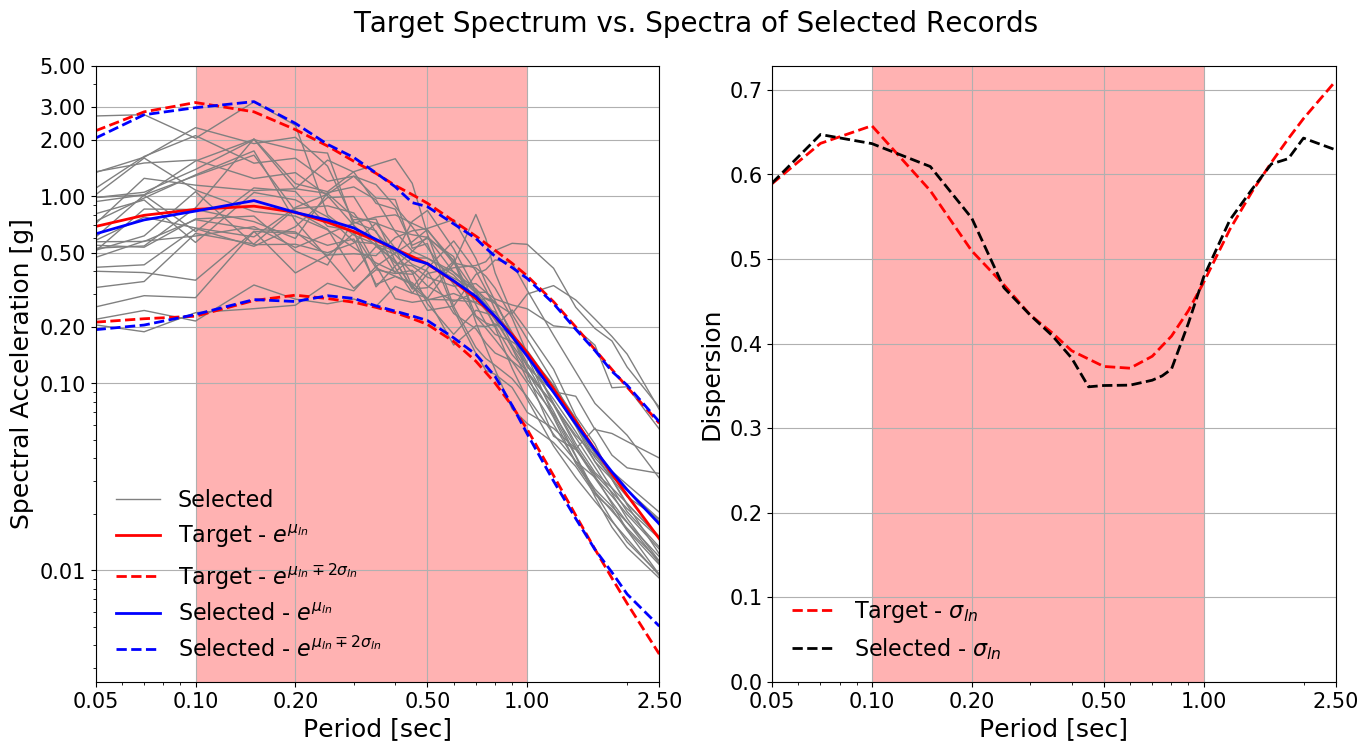


Started executing download method to retrieve selected records from https://esm-db.eu
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.01-in-50-years\unscaled_records_2023_7_6_11_39_25_3_187_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.01-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 12.00 %
Max error in standard deviation = 12.07 %


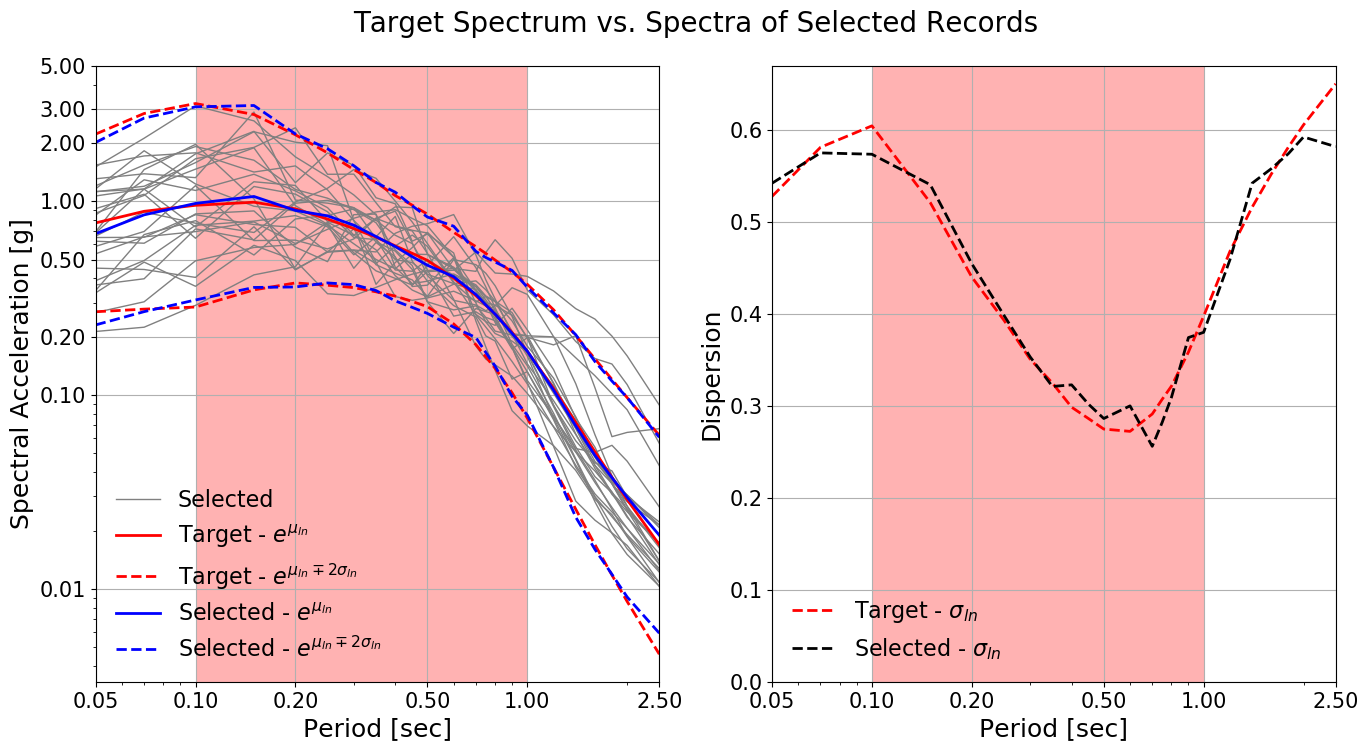


Started executing download method to retrieve selected records from https://esm-db.eu
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.005-in-50-years\unscaled_records_2023_7_6_11_40_10_3_187_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.005-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 18.26 %
Max error in standard deviation = 11.66 %


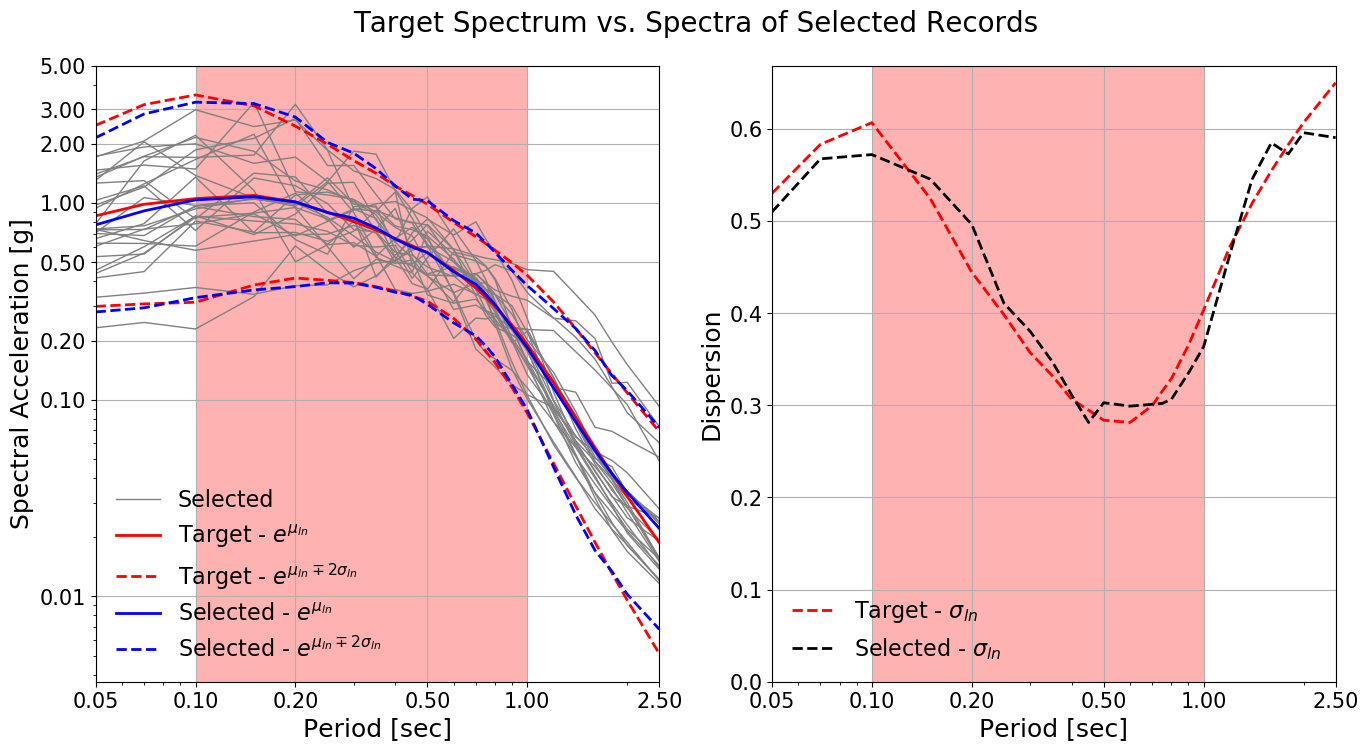


Started executing download method to retrieve selected records from https://esm-db.eu
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.0025-in-50-years\unscaled_records_2023_7_6_11_40_55_3_187_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.0025-in-50-years
Target spectrum is created.
Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 23.36 %
Max error in standard deviation = 13.47 %


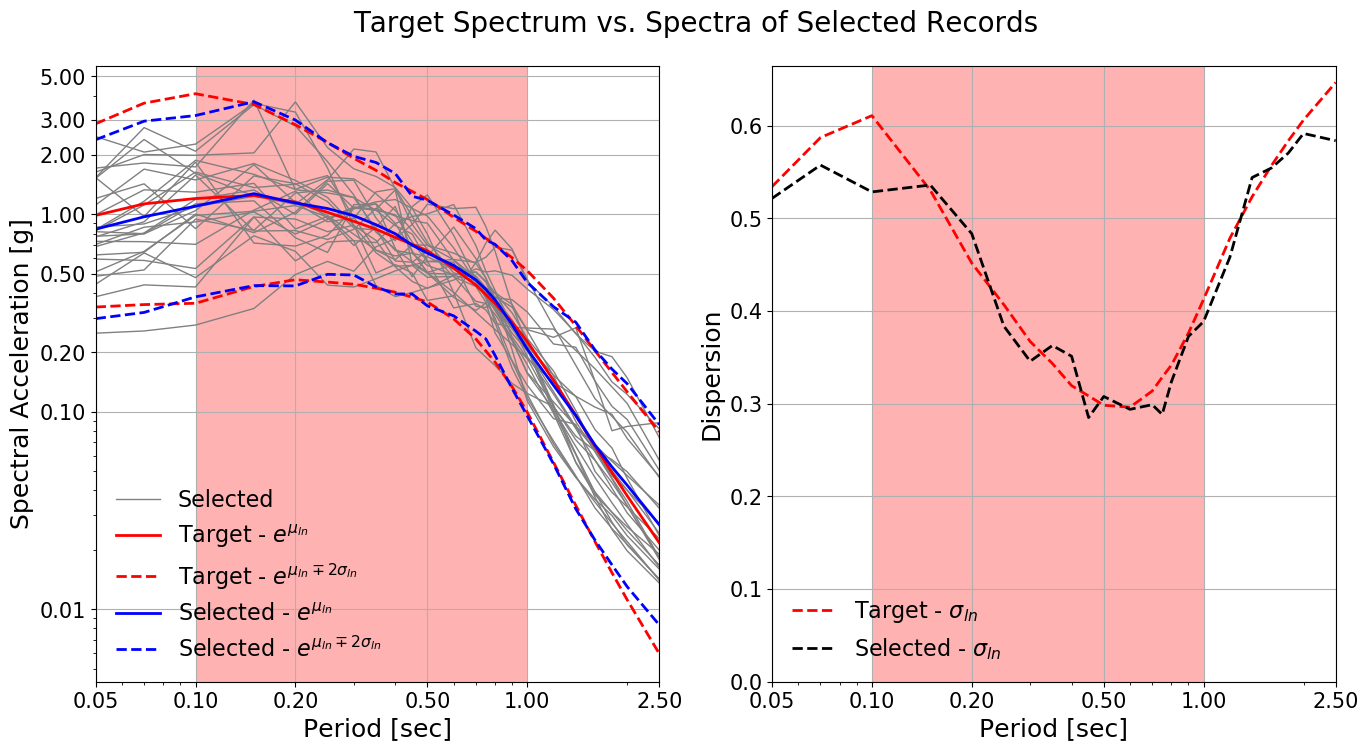


Started executing download method to retrieve selected records from https://esm-db.eu
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.001-in-50-years\unscaled_records_2023_7_6_11_41_38_3_187_0.zip
Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\EzGM_Outputs_AvgSA\POE-0.001-in-50-years


In [ ]:
# Get token once to avoid repetitive download of it later
token = get_esm_token(username='example_username@email.com', password='example_password123456')

# Check attributes of ground motion prediction equation BooreEtAl2014
check_gmpe_attributes(gmpe='BooreEtAl2014')

# Get list of IMs
ims = []
for file in os.listdir(post_dir):
    if file.startswith('imls'):
        ims.append(file.split('_')[1].split('.out')[0])

# Start selecting records for each IM in the IM list
for im in ims:
    # Read hazard and disaggregation info
    imls = np.loadtxt(os.path.join(post_dir, 'imls_' + im + '.out'))
    mean_mags = np.loadtxt(os.path.join(post_dir, 'mean_mags_' + im + '.out'))
    mean_dists = np.loadtxt(os.path.join(post_dir, 'mean_dists_' + im + '.out'))

    for i in range(len(poes)):
        # a) We can use mean magnitude and mean distance values to compute approximate CS.
        mags = [mean_mags[i]]
        dists = [mean_dists[i]]
        hconts = [1.0]
        rakes = [0.0]

        # b) We can also consider all contributing scenarios to compute exact CS.
        disagg = np.loadtxt(os.path.join(post_dir,'MagDist_poe_' + str(poes[i]) + '_' + im + '.out'))
        mags = disagg[:, 0].tolist()
        dists = disagg[:, 1].tolist()
        hconts = disagg[:, 2].tolist()
        rakes = [0.0]*len(mags)

        # 1) Initialize the conditional_spectrum object for record selection, check which parameters are required for the gmpe you are using.
        cs = ConditionalSpectrum(database='ESM_2018', output_directory=os.path.join('EzGM_Outputs_' + im, 'POE-' + str(poes[i]) + '-in-50-years'))

        # 2) Create target spectrum
        cs.create(Tstar=np.arange(0.1, 1.1, 0.1), gmpe='BooreEtAl2014', num_components=1, spectrum_definition='RotD50',
                  site_param={'vs30': reference_vs30_value}, rup_param={'rake': rakes, 'mag': mags},
                  dist_param={'rjb': dists}, hz_cont=hconts, period_range=[0.05, 2.5],
                  im_Tstar=imls[i], epsilon=None, use_variance=1, correlation_model='baker_jayaram')

        # 3) Select the ground motions
        cs.select(num_records=25, is_scaled=1, max_scale_factor=2.5,
                  mag_limits=None, vs30_limits=None, rjb_limits=None, mech_limits=None, num_simulations=20,
                  error_weights=[1, 2, 0.3], seed_value=0, num_greedy_loops=2, penalty=3, tolerance=10)

        # Plot the target spectrum, simulated spectra and spectra of selected records
        cs.plot(target=0, simulations=0, records=1, save=1, show=1)

        # 4) First the records can be downloaded via download method.
        # If database='ESM_2018' either available token path or valid credentials must be provided.
        # Token can be retrieved manually by the user or externally using utility.get_esm_token method.
        # In this case, the token will be retrieved for previously externally downloaded token, and
        # the records will be retrieved from [https://esm-db.eu].
        # If you already have record database elsewhere you can ignore and comment this part
        cs.download(token_path=token)

        # 5) If you have records already inside zip_parent_path\database.zip\database or downloaded records,
        # write whatever you want, the object itself, selected and scaled time histories
        cs.write(object=1, records=0, zip_parent_path='')

In [ ]:
# Calculate the total time passed
run_time(start_time)

Run time: 0 hours: 7 minutes: 30.46 seconds
